# Exploration and Analysis

In this section we will take a closer look at the cleaned data obtained previously.

In [132]:
#Load essential data processing libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter #allow multiprocessor .apply
%matplotlib inline
import seaborn as sns
import calendar


In [456]:
#We start by loading the raw data into a pandas dataframe
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cleaned_data = pd.read_feather('../data/races.cleaned.feather')

In [457]:
#What fields are there?
cleaned_data.dtypes

id                                   int64
track_id                          category
challenger                           int64
opponent                             int64
money                                int64
winner                               int64
status                            category
weather                           category
cleaned_race_created        datetime64[ns]
cleaned_race_driven         datetime64[ns]
cleaned_fuel_consumption           float64
forecast_sunny                       int64
forecast_rainy                       int64
forecast_thundery                    int64
forecast_snowy                       int64
forecasted_wheater                category
forecasted_confidence                int64
dtype: object

# How popular has raving become?

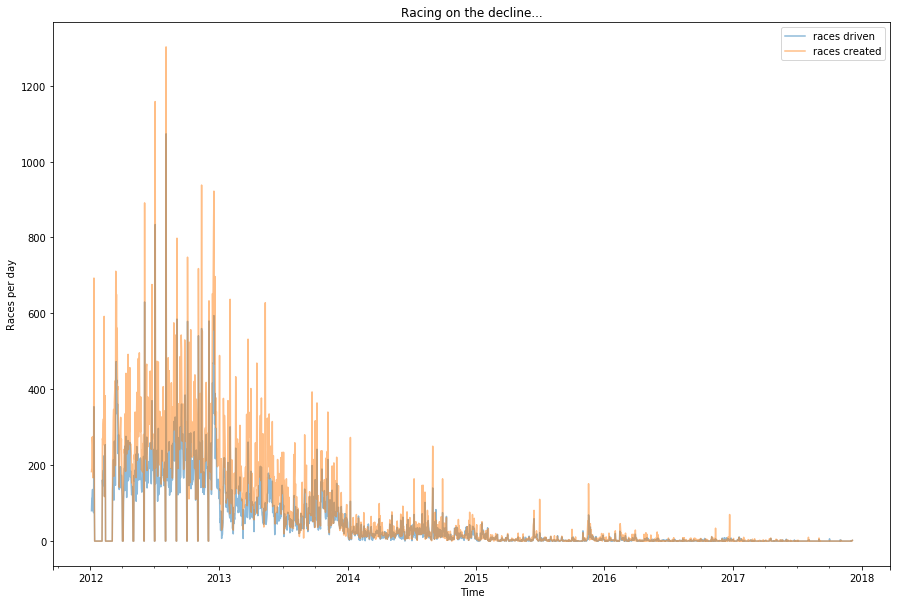

In [461]:
ax = cleaned_data.resample('1D', on='cleaned_race_driven')['id'].count().plot(alpha=0.5,label='races driven')
cleaned_data.resample('1D', on='cleaned_race_created')['id'].count().plot(ax=ax,alpha=0.5,label='races created')
ax.set_title("Racing on the decline...")
ax.set_ylabel("Races per day")
ax.set_xlabel("Time")
ax.legend()
fig = plt.gcf()
fig.set_size_inches(15,10)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

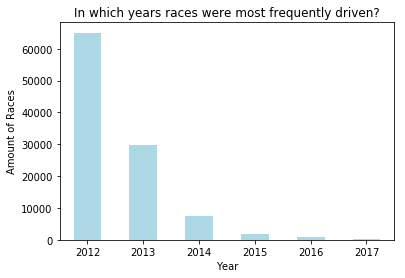

In [466]:
ax = raw_data[raw_data['status'] == 'finished'].groupby(["year"]).size().plot(kind='bar',color='lightblue')
ax.set_xlabel("Year")
ax.set_ylabel("Amount of Races")
ax.set_title('In which years races were most frequently driven?')
plt.xticks(rotation='horizontal')

We observe that racing is on the decline over time. While the majority of races in our dataset have been happening in 2012 and 2013 in recent years the volume of races has drastically declined.

## When are races being driven?

Next, we look at the Times during a week and during a year when races are being conducted.

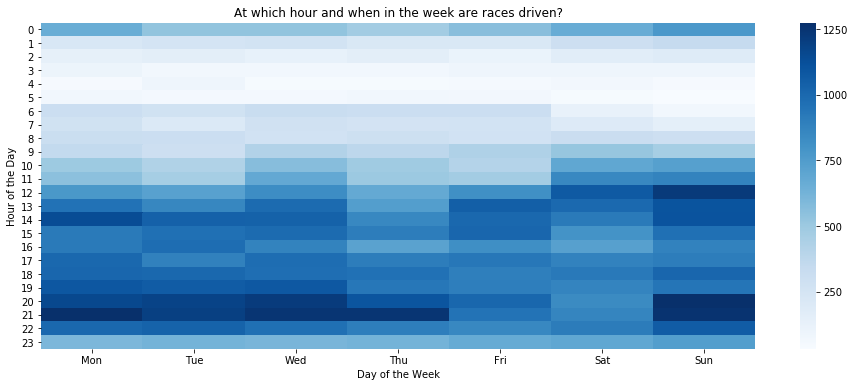

In [150]:
days_of_week = list(calendar.day_abbr)
raw_data = raw_data[raw_data['status'] == 'finished']

#Create some extra features for this
raw_data['hour'] = raw_data['cleaned_race_driven'].apply(lambda x: x.hour)
raw_data['day_of_week'] = raw_data['cleaned_race_driven'].apply(lambda x: days_of_week[x.weekday()])

df_heat = raw_data[raw_data['status'] == 'finished'].groupby(["hour", "day_of_week"])["id"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day_of_week", "id")
plt.figure(figsize = (16,6))
ax = sns.heatmap(df_heat2[days_of_week], cmap="Blues")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Hour of the Day")
plt.yticks(rotation='horizontal')
_=ax.set_title('At which hour and when in the week are races driven?')

We observe Races are frequently started between 13-14h and 20-22h. There are almost no races during night hours. Moreover, races on Fridays and Saturdays are not as frequent as on other weekdays.

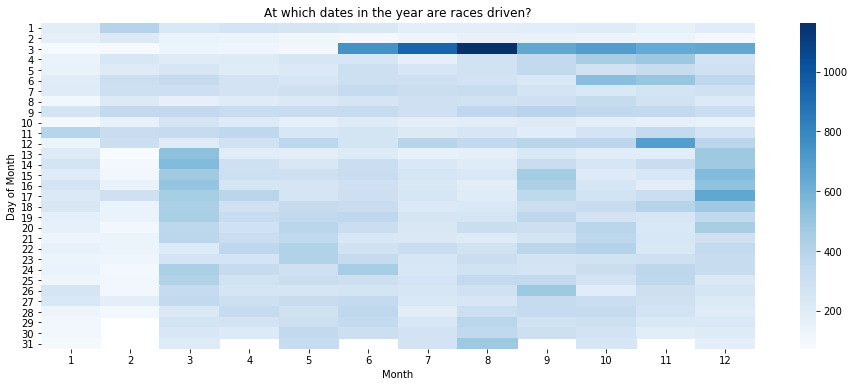

In [464]:
#At which days/months are races driven?
days_of_week = list(calendar.day_abbr)
raw_data = raw_data[raw_data['status'] == 'finished']

#Create some extra features for this
raw_data['year'] = raw_data['cleaned_race_driven'].apply(lambda x: x.year)
raw_data['day'] = raw_data['cleaned_race_driven'].apply(lambda x: x.day)
raw_data['month'] = raw_data['cleaned_race_driven'].apply(lambda x: x.month)

df_heat = raw_data[raw_data['status'] == 'finished'].groupby(["day", "month"])["id"].size().reset_index()
df_heat2 = df_heat.pivot("day", "month", "id")
plt.figure(figsize = (16,6))
ax = sns.heatmap(df_heat2, cmap="Blues")
ax.set_xlabel("Month")
ax.set_ylabel("Day of Month")
plt.yticks(rotation='horizontal')
_=ax.set_title('At which dates in the year are races driven?')

Furthermore, we observe Races are very frequently driven on the 3rd of a month From June to December. Additionally, we see fewer races happening in the first half of the year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

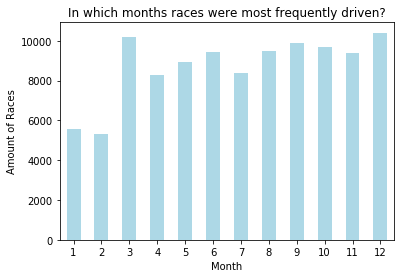

In [178]:
ax = raw_data[raw_data['status'] == 'finished'].groupby(["month"]).size().plot(kind='bar',color='lightblue')
ax.set_title('In which months races were most frequently driven?')
ax.set_xlabel("Month")
ax.set_ylabel("Amount of Races")
plt.xticks(rotation='horizontal')

This graph above confirms, that Races in January and February are less often than in other months of the year.

# Challenger vs. Opponent

Next, we take a closer look at the relationship between challenger and opponent.

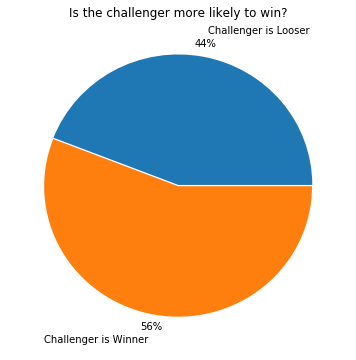

In [468]:
plt.figure(figsize = (6,6))
raw_data['challenger_is_winner'] = raw_data['challenger'] == raw_data['winner']
data = raw_data[raw_data['status'] == 'finished'].groupby(["challenger_is_winner"]).size()
ax = data.plot.pie(labels=['Challenger is Looser','Challenger is Winner'],autopct='%1.0f%%',explode=[0.01,0.0], pctdistance=1.1, labeldistance=1.2)
ax.set_ylabel("")
_ = ax.set_title('Is the challenger more likely to win?')

It seems as if the challenger has a slight advantage against the opponent, i.e. he is winning more often then loosing.

# Track Popularity

Text(0.5,1,'Which tracks are more popular than others?')

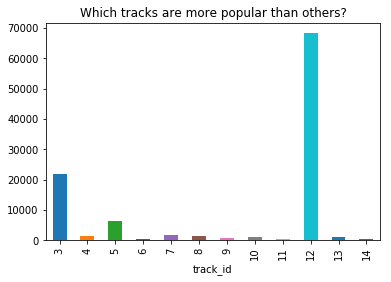

In [237]:
raw_data['track_id'] = raw_data['track_id'].astype(int)
ax = raw_data[raw_data['status'] == 'finished'].groupby("track_id").size().plot(kind='bar')
ax.set_title('Which tracks are more popular than others?')

We see that Tracks 12 and 3 are very popular amongst racers. All other tracks are driven, much less.

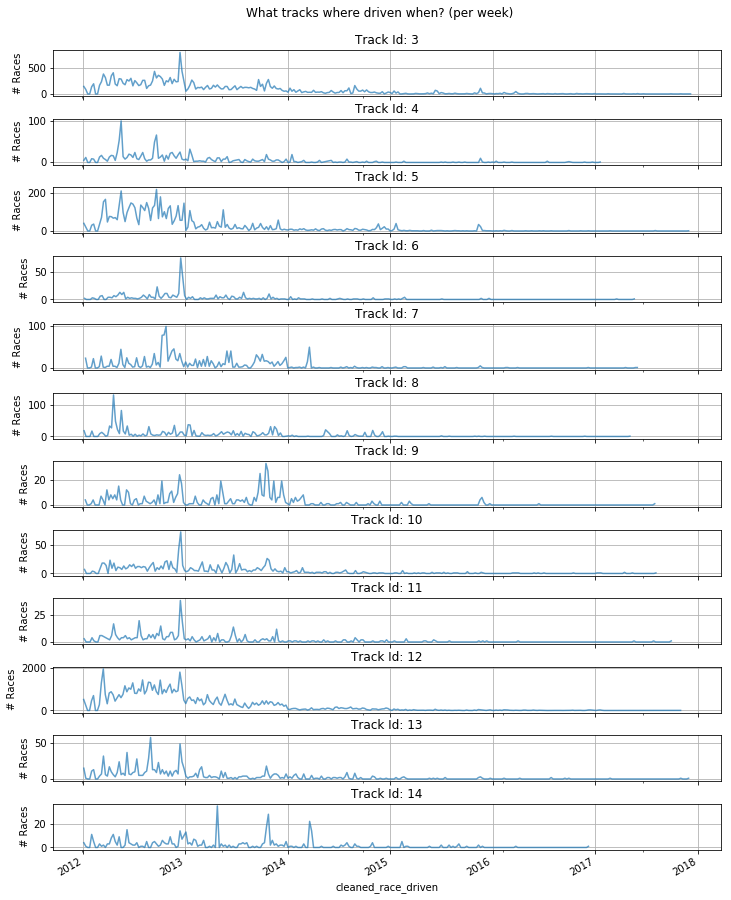

In [341]:
dateindex  = raw_data.set_index('cleaned_race_driven')
g = dateindex.groupby('track_id')
f, axes = plt.subplots(len(g),1, sharex=True)
f.set_size_inches(10,15)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.subplots_adjust(hspace = 0.5)
for i,(key,group) in enumerate(g):
    resampled = group.resample('7D')['id'].size()
    ax = resampled.plot(ax=axes[i], label=key,alpha=0.7)
    ax.grid(True)
    ax.set_title("Track Id: %d" % (key))
    ax.set_ylabel("# Races")
_ = f.suptitle("What tracks where driven when? (per week)")

The graph above shows a track's popularity (i.e. how many races have been driven in a week). We observe that tracks have different levels of usage. 

# Money 

Text(0.5,0.98,'')

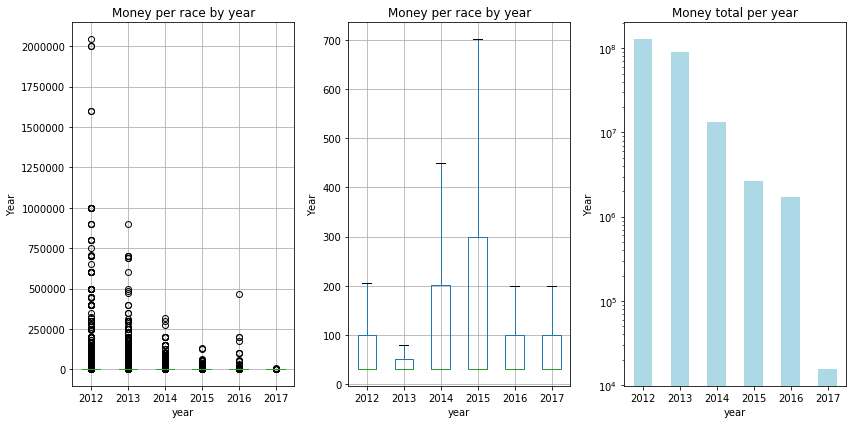

In [470]:
raw_data['track_id'] = raw_data['track_id'].astype(int)
f, axes = plt.subplots(1,3)
f.set_size_inches(12,6)
ax1 =raw_data[raw_data['status'] == 'finished'].boxplot(column='money',by='year',ax=axes[0])
ax1.set_ylabel('Money per Race w/ outliers')
ax1.set_title("Money per race by year")
ax2 = raw_data[raw_data['status'] == 'finished'].boxplot(column='money',by='year',showfliers=False,ax=axes[1])
ax2.set_ylabel('Money per Race w/o outliers')
ax2.set_title("Money per race by year")
ax3 = raw_data[raw_data['status'] == 'finished'].groupby('year')['money'].agg('sum').plot(kind='bar',color='lightblue',ax=axes[2])
ax3.set_title("Money total per year")
ax3.set_yscale('log')
ax3.set_ylabel('Total Money per Year')
plt.xticks(rotation='horizontal')
plt.tight_layout()
for ax in axes:
    ax.set_ylabel("Year")
plt.suptitle("")


We observe that the money spent during racing is on the decline too. We see the median of the money spent is always at 30. We suspect that this is the minimum racing fee.

# Who races whom?

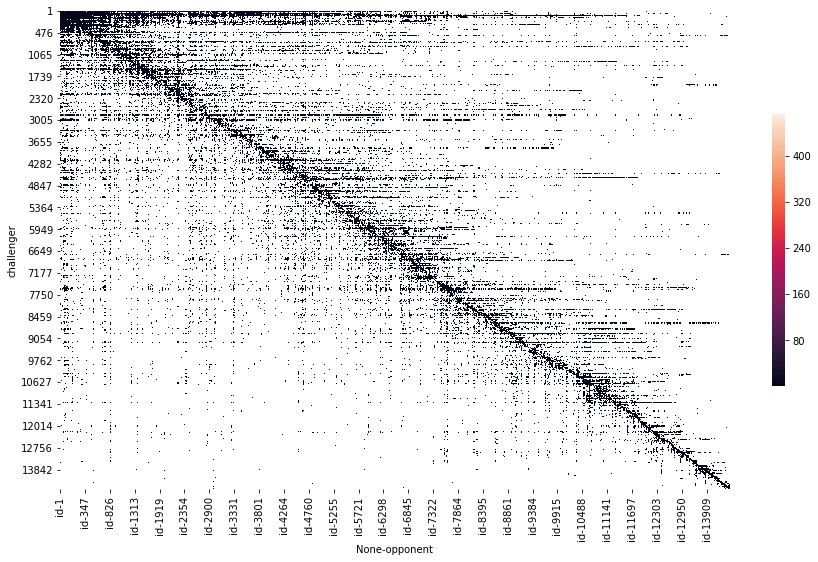

In [473]:
df_heat = raw_data[raw_data['status'] == 'finished'].groupby(['challenger','opponent'])["id"].size().reset_index()
df_heat2 = df_heat.pivot("challenger", "opponent")
ax = sns.heatmap(df_heat2,square=True,cbar_kws={"shrink": .5})
fig = plt.gcf()
fig.set_size_inches(15,10)

The graph above shows which racer competes against which other racer.
We see that challengers and their opponents have oftentimes IDs that are very close to each other (indicated by the diagonal line pattern).
Moreover, we can see that some racers challenge a variety of other racers while others stay within their cluster.

## How many distinct opponents does each a challenger have?


/home/bewo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1    1553
2     560
3     290
4     172
5     133
dtype: int64

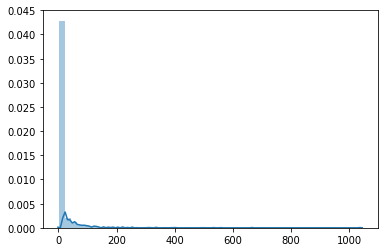

In [476]:
distinct_opponents = (~(df_heat2.T.isna())).sum()
sns.distplot(distinct_opponents)
distinct_opponents.value_counts().head()

We see that a lot of challengers have fewer than 3 distinct opponents. Let's observe how many races per challenger there are

/home/bewo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


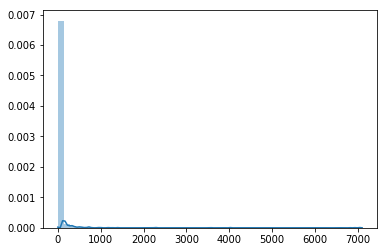

In [480]:
#How many total races does each a challenger had?
races_per_challenger = df_heat2.T.sum()
_ = sns.distplot(races_per_challenger)

Again, we see that many racers have very few races while others have up to 7000.
Let's take a look at the ration between driven races and distinct opponents

/home/bewo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'ratio races/distinct opponents')

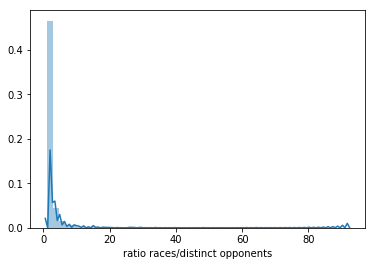

In [481]:
ratio = races_per_challenger / distinct_opponents
ax = sns.distplot(ratio)
ax.set_xlabel('ratio: races/distinct opponents')

We see that for the majority of racers there is a diverse set of oppoents. However, there seem to be some drivers that have a lot of races within their group.

In [485]:
# Let's take a look at those challengers...
pd.DataFrame([races_per_challenger,distinct_opponents],index=['races','opponents'])[ratio.sort_values(ascending=False).head(n=20).index].T

,races,opponents
challenger,,
3400,92.0,1.0
4857,86.0,1.0
382,80.0,1.0
7910,64.0,1.0
6022,61.0,1.0
6895,96.0,2.0
6822,40.0,1.0
12407,34.0,1.0
5966,59.0,2.0


# Conclusion
Here are the key findings:

- Most races have been driven in 2012/13 and racing is on the decline since those years
- Race times and dates follow seasonal and weekly patterns.
- Challengers are a bit more likely to win than opponents.
- Money per Race: At least 30 EUR and most of the time only 30 EUR.
- Challengers are often clustered amonst challengers with similiar IDs.
- Some challengers prefer to only race within their groups while others prefer to challenge different racers.
